In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../csvs/sonar_dataset.csv" , header = None)

In [4]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
df.isna().sum().sum()

0

In [8]:
X = df.drop(60 , axis=1)
y = df[60]

In [12]:
X.shape , y.shape

((208, 60), (208,))

In [13]:
y = pd.get_dummies(y , drop_first=True)

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=1)

In [10]:
import tensorflow as tf
from tensorflow import keras 

In [19]:
model = keras.Sequential([
    keras.layers.Dense(30 , input_shape = (60 , ) , activation="relu"),
    keras.layers.Dense(10 , activation="relu"),
    keras.layers.Dense(1 ,  activation="sigmoid"),
])

model.compile(optimizer="adam" , loss="binary_crossentropy" , metrics=["accuracy"])
model.fit(X_train , y_train , epochs=50 , batch_size=8)

Epoch 1/50
21/21 [==============================] - 1s 7ms/step - loss: 0.6872 - accuracy: 0.5663
Epoch 2/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6692 - accuracy: 0.5904
Epoch 3/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6583 - accuracy: 0.6205
Epoch 4/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6467 - accuracy: 0.6325
Epoch 5/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6374 - accuracy: 0.6687
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6223 - accuracy: 0.6747
Epoch 7/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6076 - accuracy: 0.6807
Epoch 8/50
21/21 [==============================] - 0s 6ms/step - loss: 0.5938 - accuracy: 0.6867
Epoch 9/50
21/21 [==============================] - 0s 8ms/step - loss: 0.5834 - accuracy: 0.7349
Epoch 10/50
21/21 [==============================] - 0s 7ms/step - loss: 0.5571 - accuracy: 0.7711
Epoch 11/50
21/21 [

In [20]:
model.evaluate(X_test , y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.4384 - accuracy: 0.7857


[0.4384368658065796, 0.7857142686843872]

In [21]:
model2 = keras.Sequential([
    keras.layers.Dense(30 , input_shape = (60 , ) , activation="relu"),
    keras.layers.Dropout(0.50),
    keras.layers.Dense(10 , activation="relu"),
    keras.layers.Dropout(0.30),
    keras.layers.Dense(1 ,  activation="sigmoid"),
])

model2.compile(optimizer="adam" , loss="binary_crossentropy" , metrics=["accuracy"])
model2.fit(X_train , y_train , epochs=50 , batch_size=8)

Epoch 1/50
21/21 [==============================] - 1s 10ms/step - loss: 0.7012 - accuracy: 0.5422
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 0.7287 - accuracy: 0.5301
Epoch 3/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6659 - accuracy: 0.6024
Epoch 4/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6632 - accuracy: 0.6084
Epoch 5/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6466 - accuracy: 0.6506
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6336 - accuracy: 0.6446
Epoch 7/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6677 - accuracy: 0.5904
Epoch 8/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6512 - accuracy: 0.6205
Epoch 9/50
21/21 [==============================] - 0s 7ms/step - loss: 0.6197 - accuracy: 0.6687
Epoch 10/50
21/21 [==============================] - 0s 6ms/step - loss: 0.6551 - accuracy: 0.6024
Epoch 11/50
21/21 

In [22]:
model2.evaluate(X_test , y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.4828 - accuracy: 0.7857


[0.48280829191207886, 0.7857142686843872]

In [23]:
y_predicted = model2.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [24]:
y_predicted[:10]

array([[0.01153547],
       [0.6508001 ],
       [0.85735464],
       [0.06339177],
       [0.9387437 ],
       [0.77113366],
       [0.5460994 ],
       [0.9216153 ],
       [0.10703759],
       [0.9571537 ]], dtype=float32)

In [25]:
y_predicted = np.round(y_predicted)
y_predicted[:10]

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [26]:
y_test[:10]

,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [27]:
from sklearn.metrics import confusion_matrix , classification_report

In [28]:
print(classification_report(y_test , y_predicted))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.81      0.77      0.79        22

    accuracy                           0.79        42
   macro avg       0.79      0.79      0.79        42
weighted avg       0.79      0.79      0.79        42



In [29]:
ax = confusion_matrix(y_test , y_predicted)

<AxesSubplot:>

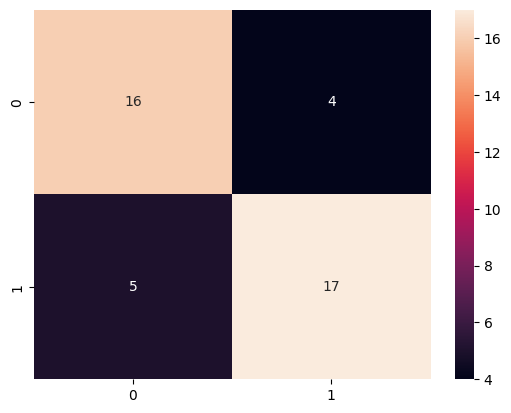

In [30]:
import seaborn as sns
sns.heatmap(ax , annot=True , fmt="d")